In [9]:
import pandas as pd 
import matplotlib.pyplot as plt


In [3]:
path = "tratamiento_de_valores_faltantes-1.csv"
df = pd.read_csv(path)

In [101]:
df.head()

,x1,x2,x3,x4
0,1.307150,Comida rápida,5.249548,2.790293
1,18.422083,Mexicano,5.278007,3.330853
2,7.729605,Italiano,7.403145,2.895753
3,10.599776,Comida rápida,7.209577,3.393178
4,5.612505,Chino,5.896599,2.901199


In [102]:
df[df.isna().any(axis= 1)]

,x1,x2,x3,x4
9,19.891735,Mexicano,5.933169,NaN
17,4.286580,Colombiano,6.624473,NaN
18,6.578716,NaN,4.276853,3.138885
19,19.743920,Mexicano,7.270445,NaN
22,NaN,Colombiano,4.244171,3.059077
...,...,...,...,...
458,14.562191,Tailandés,4.433628,NaN
479,16.030986,NaN,7.967528,2.744920
487,13.976887,NaN,4.059707,2.845635
489,NaN,Colombiano,7.096163,2.960235


COLUMNA X1

Distribución de la columna 'x1':
count    482.000000
mean      11.946714
std        5.519551
min      -11.866135
25%        8.513927
50%       11.997242
75%       15.061229
max       36.922954
Name: x1, dtype: float64



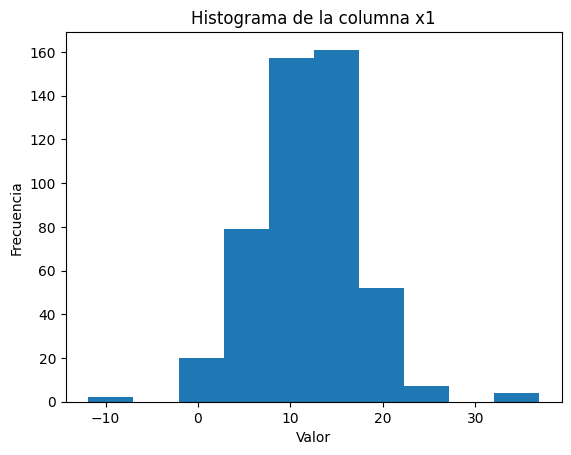

La columna 'x1' tiene valores atípicos:
128    36.036833
254   -11.866135
260    36.922954
348    -1.936713
368    35.025965
377   -11.328720
407    35.909201
Name: x1, dtype: float64

Cantidad de valores nulos en la columna 'x1': 18



In [11]:
def analizar_columna(df, column_name):
    # Obtener la columna del DataFrame
    columna = df[column_name]
    
    # Calcular el rango intercuartílico (IQR)
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    
    # Identificar valores nulos
    valores_nulos = columna.isnull().sum()
    
    # Identificar outliers
    outliers = columna[(columna < (Q1 - 1.5 * IQR)) | (columna > (Q3 + 1.5 * IQR))]
    
    # Mostrar distribución de la columna
    print("Distribución de la columna '{}':".format(column_name))
    print(columna.describe())
    print()
    
    # Graficar histograma
    plt.hist(columna, bins=10)  # Puedes ajustar el número de bins según tus datos
    plt.title('Histograma de la columna {}'.format(column_name))
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.show()
    
    # Verificar si hay outliers
    if len(outliers) > 0:
        print("La columna '{}' tiene valores atípicos:".format(column_name))
        print(outliers)
        print()
    else:
        print("La columna '{}' no tiene valores atípicos.".format(column_name))
        
    # Mostrar cantidad de valores nulos
    print("Cantidad de valores nulos en la columna '{}': {}".format(column_name, valores_nulos))
    print()

# Ejemplo de uso
# Suponiendo que 'df' es tu DataFrame y 'nombre_columna' es el nombre de la columna que deseas analizar
nombre_columna = 'x1'  # Reemplaza 'nombre_de_la_columna' con el nombre real de la columna
analizar_columna(df, nombre_columna)


Debido a que es una variable numerica, con una distribución normal o cercano a la normal que tiene valores atípicos, lo recomendado es usar la mediana. 

In [13]:
mediana_A = df['x1'].median()
df['x1'].fillna(mediana_A, inplace=True)
print("Ahora hay",df['x1'].isna().sum(), "valores nulos")

Ahora hay 0 valores nulos


C:\Users\maria\AppData\Local\Temp\ipykernel_15608\3435134760.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['x1'].fillna(mediana_A, inplace=True)


COLUMNA X3

Distribución de la columna 'x3':
count    486.000000
mean       5.955536
std        1.180116
min        4.010899
25%        4.903998
50%        5.887484
75%        7.045557
max        7.985803
Name: x3, dtype: float64



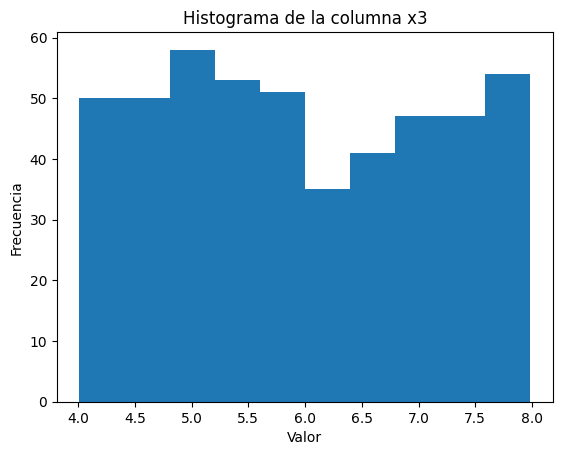

La columna 'x3' no tiene valores atípicos.
Cantidad de valores nulos en la columna 'x3': 14



In [14]:
analizar_columna(df, "x3")

Debido a que es una variable numerica, con una distribución cercana a la uniforme lo recomendado es usar la sustitución aleatoria. 

In [15]:
df['x3'].fillna(df['x3'].sample(n=1).iloc[0], inplace=True)
print("Ahora hay",df['x3'].isna().sum(), "valores nulos")

Ahora hay 0 valores nulos


C:\Users\maria\AppData\Local\Temp\ipykernel_15608\3817881710.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['x3'].fillna(df['x3'].sample(n=1).iloc[0], inplace=True)


COLUMNA X4

Distribución de la columna 'x4':
count    483.000000
mean       3.003786
std        0.194015
min        2.506359
25%        2.876961
50%        3.000913
75%        3.133229
max        3.496185
Name: x4, dtype: float64



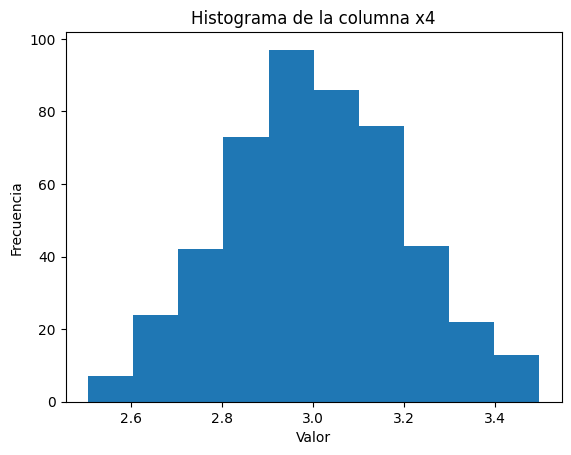

La columna 'x4' no tiene valores atípicos.
Cantidad de valores nulos en la columna 'x4': 17



In [16]:
analizar_columna(df, "x4")

Debido a que es una variable numerica, con una distribución normal o cercano a la normal que tiene valores atípicos, lo recomendado es usar la mediana. 

In [17]:
mediana_B = df['x1'].median()
df['x1'].fillna(mediana_B, inplace=True)
print("Ahora hay",df['x1'].isna().sum(), "valores nulos")

Ahora hay 0 valores nulos


C:\Users\maria\AppData\Local\Temp\ipykernel_15608\2933458360.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['x1'].fillna(mediana_B, inplace=True)


COLUMNA X2


Debido a que es una variable categorica y no númerica es recomendado rellenarlo con la moda.

In [19]:
df['x2'].fillna(df['x2'].mode()[0], inplace=True)
print("Ahora hay",df['x2'].isna().sum(), "valores nulos")

Ahora hay 0 valores nulos
